# Exploring and Analyzing Job Postings Dataset

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('/kaggle/input/data-analyst-job-postings-google-search/gsearch_jobs.csv')
# Display information about the dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39980 entries, 0 to 39979
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           39980 non-null  int64  
 1   index                39980 non-null  int64  
 2   title                39980 non-null  object 
 3   company_name         39980 non-null  object 
 4   location             39953 non-null  object 
 5   via                  39971 non-null  object 
 6   description          39980 non-null  object 
 7   extensions           39980 non-null  object 
 8   job_id               39980 non-null  object 
 9   thumbnail            23419 non-null  object 
 10  posted_at            39980 non-null  object 
 11  schedule_type        39803 non-null  object 
 12  work_from_home       17893 non-null  object 
 13  salary               6787 non-null   object 
 14  search_term          39980 non-null  object 
 15  date_time            39980 non-null 

# 🧹 Remove Duplicate Job Entries

In [2]:
# Keep only the first occurrence of each job_id
df = df[~df.job_id.duplicated(keep="first")]

# 📊 Visualizing Job Title Distribution

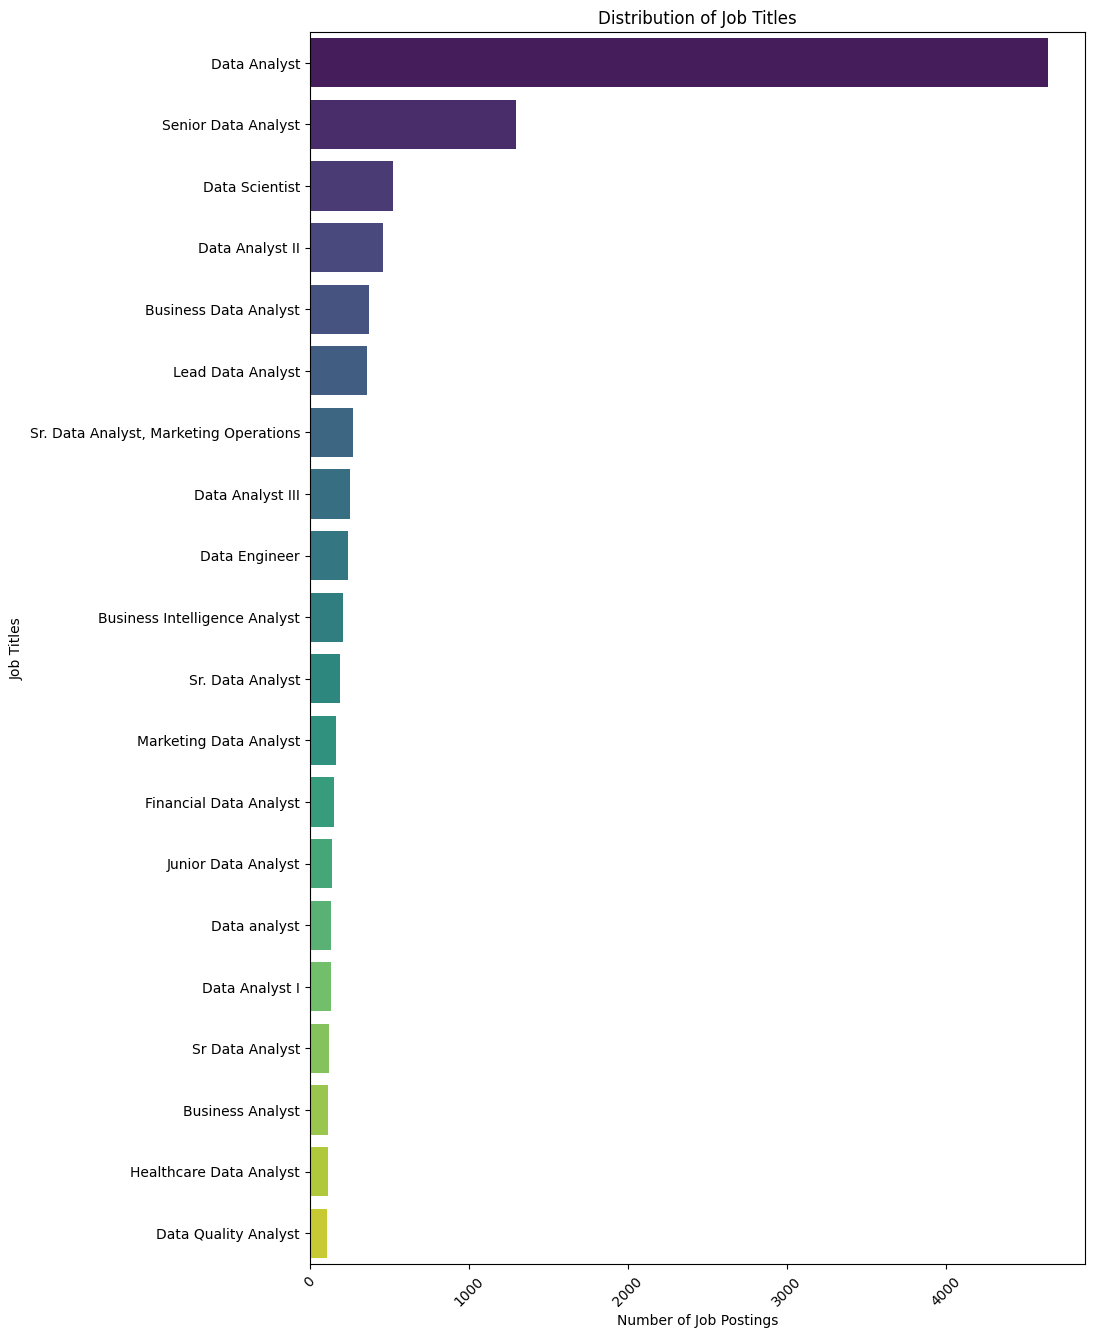

In [113]:
# Get the top 20 job titles and their counts
job_title_counts = df["title"].value_counts().head(20)

# Plotting the distribution
plt.figure(figsize=(10,16))
sns.barplot(x=job_title_counts.values,
            y=job_title_counts.index,
            palette="viridis",
            orient="h"
           )

# Adding title and labels
plt.title("Distribution of Job Titles")
plt.xlabel("Number of Job Postings")
plt.ylabel("Job Titles")
plt.xticks(rotation=45) 
plt.show()

# Visualizing Job Posting Distribution by Companies

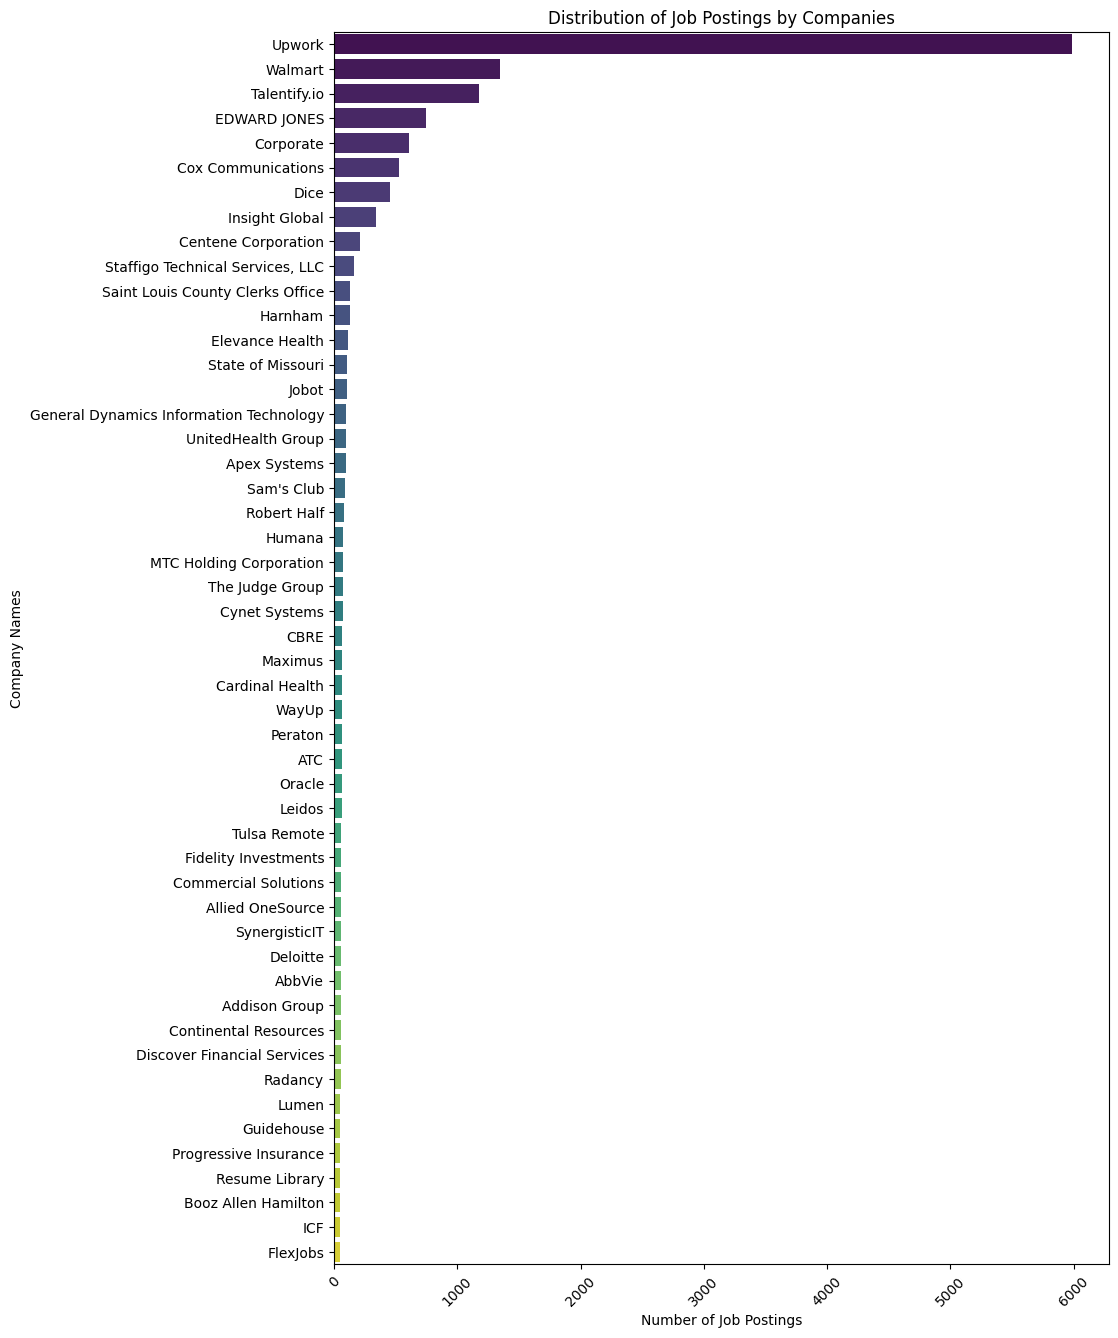

In [4]:
# Get the top 50 companies and their job posting counts
most_companies = df["company_name"].value_counts().head(50)

# Plotting the distribution
plt.figure(figsize=(10,16))
sns.barplot(x=most_companies.values,
            y=most_companies.index,
            palette="viridis",
            orient="h"
           )

# Adding title and labels
plt.title("Distribution of Job Postings by Companies")
plt.xlabel("Number of Job Postings")
plt.ylabel("Company Names")
plt.xticks(rotation=45) 
plt.show()

# 🌎 Exploring Top Job Locations for Data Analysts

In [5]:
# Clean and filter the dataset
df["location"] = df["location"].str.strip()

In [6]:
# To display only the locations, we remove "Anywhere" and "United States".
df_filtered = df[df["location"].str.contains("Anywhere|United States") == False]

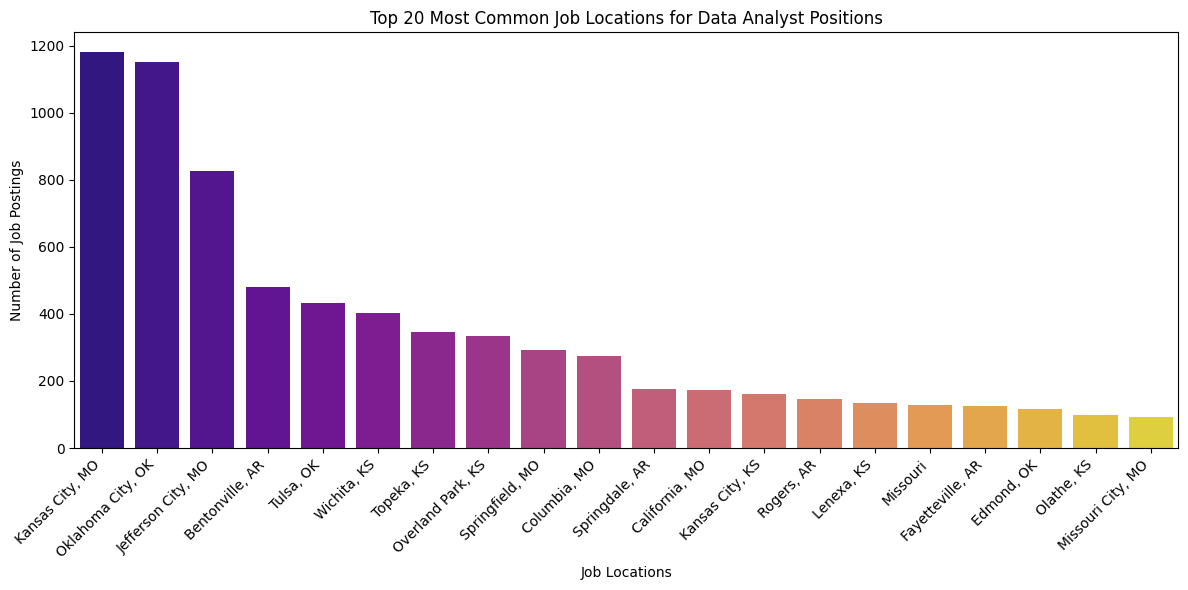

In [7]:
# Get the top 20 most common job locations
location_counts = df_filtered["location"].value_counts().head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=location_counts.index,
            y=location_counts.values,
            palette="plasma")
plt.title("Top 20 Most Common Job Locations for Data Analyst Positions")
plt.xlabel("Job Locations")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 🏡 Comparing On-Site and Remote Job Distributions

In [8]:
df.loc[df['location'] == 'Anywhere', 'work_type'] = 'remote'

# Check for the word "remote" 
df.loc[df['title'].str.contains(r'\bremote\b', case=False) & ~df['title'].str.contains(r'\bnot\b', case=False), 'work_type'] = 'remote'

# Check for the word "hybrid"
df.loc[df['title'].str.contains(r'\bhybrid\b', case=False), 'work_type'] = 'hybrid'

# Check for both "remote" and "hybrid"
df.loc[df['title'].str.contains(r'\bremote\b', case=False) & df['title'].str.contains(r'\bhybrid\b', case=False) & ~df['title'].str.contains(r'\bnot\b', case=False), 'work_type'] = 'remote_hybrid'

# Check the remaining cases (i.e. those that do not pass "remote" or "hybrid" and those that do not pass "Anywhere")
df.loc[(~df['title'].str.contains(r'\bremote\b|\bhybrid\b', case=False)) & (df['location'] != 'Anywhere'), 'work_type'] = 'on-site'

In [ ]:
# Get the count of each work type
vcount_worktype = df["work_type"].value_counts()

In [ ]:
# To get a better visual on the pie chart, we combine the expressions "remote_hybrid" and "hybrid" and change them to "other".
result_series = vcount_worktype.iloc[:2]
result_series["others"] = vcount_worktype["remote_hybrid"] + vcount_worktype["hybrid"]

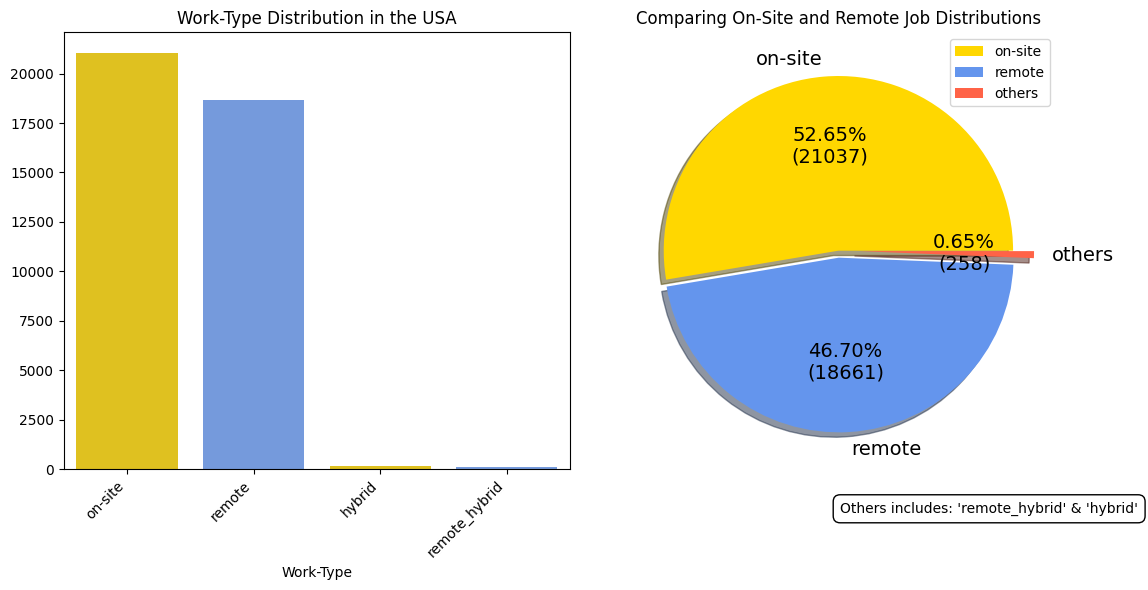

In [120]:
plt.figure(figsize=(12, 6))

color_palette = ["gold", "cornflowerblue"]
# Bar Plot
plt.subplot(1, 2, 1)
sns.barplot(x=vcount_worktype.index,
            y=vcount_worktype.values,
            palette=color_palette)

plt.title('Work-Type Distribution in the USA')
plt.xlabel("Work-Type")
plt.xticks(rotation=45, ha="right")



# Pie plot
plt.subplot(1, 2, 2)
plt.pie(x=result_series,
        labels=result_series.index,
        autopct=lambda p: '{:.2f}%\n({:.0f})'.format(p, p * sum(vcount_worktype) / 100),
        textprops={"fontsize": 14},
        colors=["gold", "cornflowerblue", "tomato"],
        shadow=True,
       explode = [0,0.04,0.12])

plt.title("Comparing On-Site and Remote Job Distributions")
plt.legend()

expl_text = ("Others includes: 'remote_hybrid' & 'hybrid'")
plt.text(0.01, -1.5, expl_text, fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.tight_layout()
plt.show()

# 🌐 Exploring Top 20 Job Posting Sites Most Used by Employers

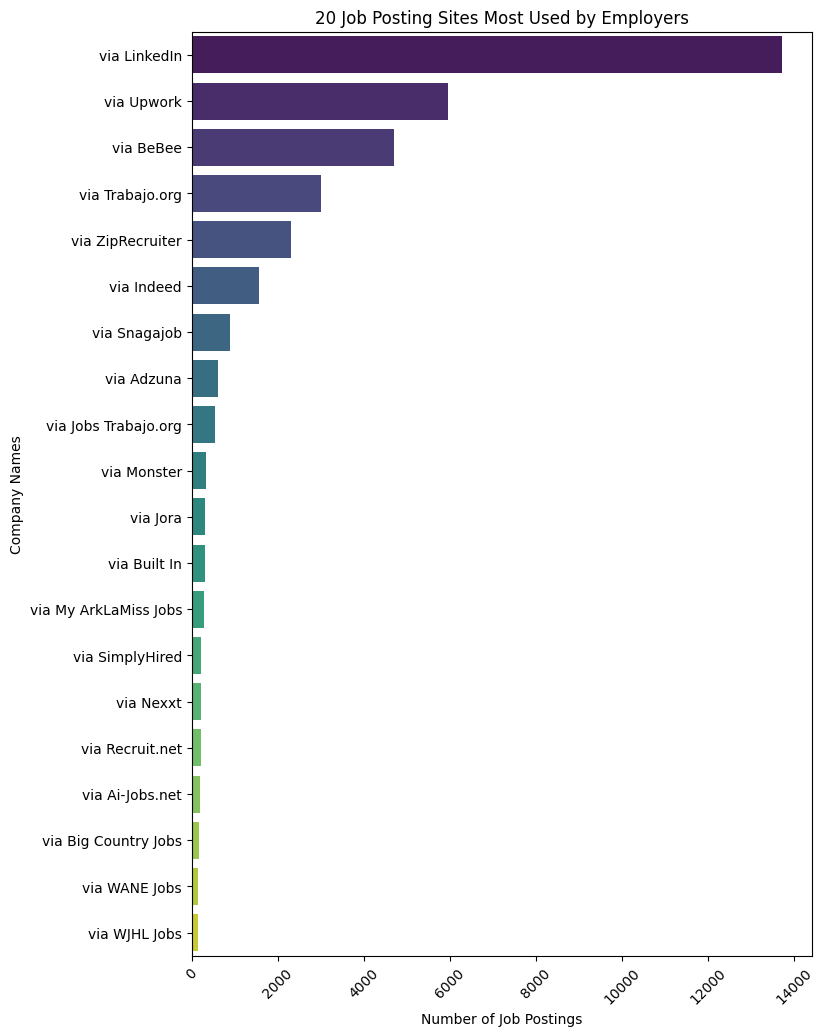

In [101]:
via = df.via.value_counts().head(20)

plt.figure(figsize=(8,12))
sns.barplot(x=via.values,
            y=via.index,
            palette="viridis",
            orient="h"
           )

plt.title("20 Job Posting Sites Most Used by Employers")
plt.xlabel("Number of Job Postings")
plt.ylabel("Company Names")
plt.xticks(rotation=45) 
plt.show()

# 🗺️ Exploring Job Postings by State

In [102]:
# Filter dataset for valid location entries
jobmap_df = df_filtered[df_filtered['location'].str.contains(r'^[^\d,]+,\s*[A-Z]{2}$', regex=True, na=False)]

# Extract city and state code from the location
jobmap_df[["city", "code"]] = jobmap_df["location"].str.split(", ", expand=True)

/tmp/ipykernel_42/2938652018.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobmap_df[["city", "code"]] = jobmap_df["location"].str.split(", ", expand=True)
/tmp/ipykernel_42/2938652018.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jobmap_df[["city", "code"]] = jobmap_df["location"].str.split(", ", expand=True)


In [103]:
import plotly.graph_objects as go

# Group by state code and count job postings
jobmap = jobmap_df.groupby(["code"])["city"].count()

# Create a choropleth map
fig = go.Figure(data=go.Choropleth(
    locations=jobmap.index,
    z=jobmap.values.astype(float),
    locationmode="USA-states",
    colorscale="Blues",
    colorbar_title="Number of Job Postings",
    text=[f"Count of Job Posting: {count}" for count in jobmap.values]
))

# Update layout for a better visualization
fig.update_layout(
    title_text="🗺️ Number of Job Postings by State",
    geo_scope="usa"
)

# Display the map
fig.show()


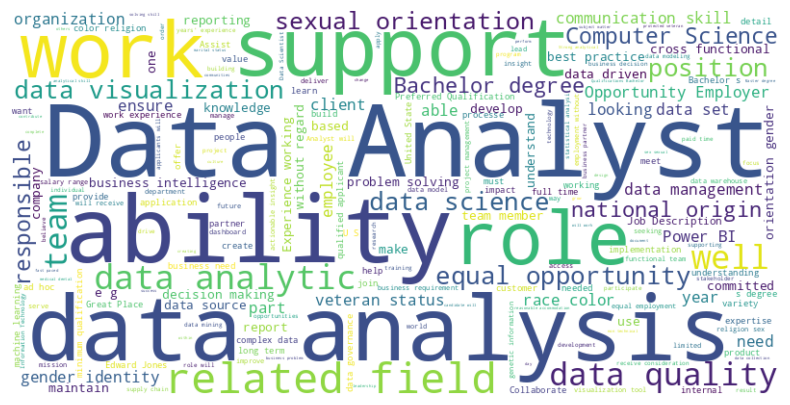

In [108]:
from wordcloud import WordCloud

text = ' '.join(df["description"])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 🚀 Conclusion

In this thrilling exploration of the job postings dataset, we've taken a fascinating journey through various aspects of data analyst positions. Here are some key insights:

- **Job Titles and Companies:** Explored the distribution of job titles and identified the top 50 companies with the most job postings.

- **Work Type Comparison:** Compared the distribution of on-site and remote/hybrid job postings, revealing the evolving landscape of work types.

- **Job Posting Sites:** Investigated the 20 most used job posting sites, providing valuable information for job seekers and employers.

- **Geographical Analysis:** Mapped the number of job postings by state, offering a visual representation of job opportunities across the USA.

- **Final Comparison:** Concluded with a visual comparison of work-type distributions, utilizing both bar plots and a pie chart for a comprehensive view.

This exploration not only provides valuable insights for job seekers and employers but also showcases the power of data analysis in unraveling patterns and trends. Happy exploring!
